In [1]:
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient

In [2]:
import pymysql
import pandas as pd

In [3]:
db_name = 'hr'
db_host = 'localhost'
db_username = 'root'
db_password = 'kiranprm11mysql'

In [4]:
try:
    conn = pymysql.connect(host = db_host,
                            port = int(3306),
                            user = 'root',
                            passwd = db_password,
                            db = db_name)
except e:
    print(e)

In [5]:
if conn:
    print('connected')
else:
    print('error')

connected


### QUESTIONS 

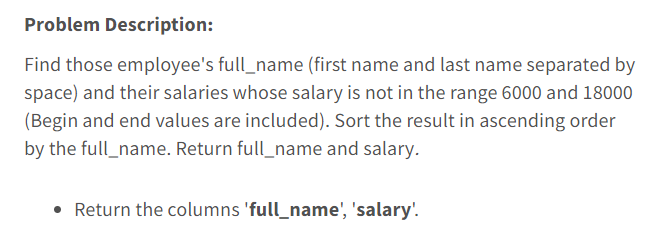

In [7]:
pd.read_sql_query('''



SELECT 
    CONCAT(first_name, " ", last_name) AS full_name,
    salary
FROM employees
WHERE salary < 6000 OR salary > 18000
ORDER BY full_name 


''', conn).head(10)

,full_name,salary
0,Alana Walsh,3100
1,Alexander Khoo,3100
2,Alexis Bull,4100
3,Anthony Cabrio,3000
4,Britney Everett,3900
5,Curtis Davies,3100
6,David Austin,4800
7,Diana Lorentz,4200
8,Donald OConnell,2600
9,Douglas Grant,2600


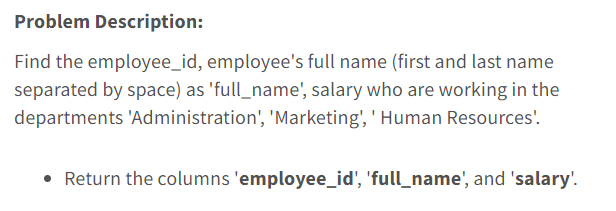

In [11]:
pd.read_sql_query('''



SELECT 
    employee_id,
    CONCAT(first_name," ",last_name) AS full_name,
    salary
FROM employees
WHERE department_id in (
    select department_id 
    from departments 
    where department_name in ( 'Administration', 'Marketing', 'Human Resources')
    ) 


''', conn).head(10)

,employee_id,full_name,salary
0,200,Jennifer Whalen,4400
1,201,Michael Hartstein,13000
2,202,Pat Fay,6000
3,203,Susan Mavris,6500


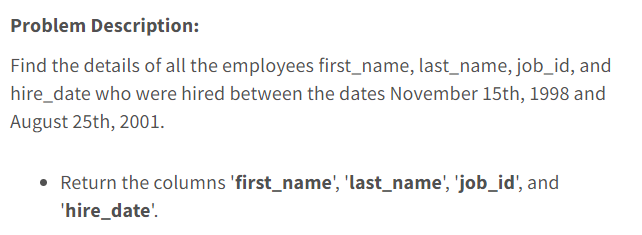

In [12]:
pd.read_sql_query('''

SELECT 
    first_name,
    last_name,
    job_id,
    hire_date
FROM employees
WHERE hire_date >= "1998-11-15" AND hire_date <= "2001-08-25"


''', conn).head(10)

,first_name,last_name,job_id,hire_date
0,Diana,Lorentz,IT_PROG,1999-02-07
1,Luis,Popp,FI_ACCOUNT,1999-12-07
2,Guy,Himuro,PU_CLERK,1998-11-15
3,Karen,Colmenares,PU_CLERK,1999-08-10
4,Kevin,Mourgos,ST_MAN,1999-11-16
5,James,Landry,ST_CLERK,1999-01-14
6,Steven,Markle,ST_CLERK,2000-03-08
7,TJ,Olson,ST_CLERK,1999-04-10
8,Ki,Gee,ST_CLERK,1999-12-12
9,Hazel,Philtanker,ST_CLERK,2000-02-06


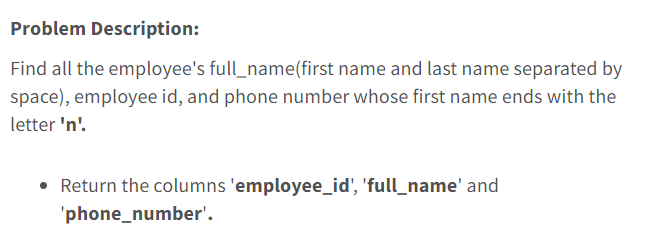

In [13]:
pd.read_sql_query('''



SELECT 
    employee_id,
    CONCAT(first_name," ",last_name) AS full_name,
    phone_number
FROM employees
WHERE first_name LIKE "%n" 


''', conn).head(10)

,employee_id,full_name,phone_number
0,100,Steven King,515.123.4567
1,110,John Chen,515.124.4269
2,114,Den Raphaely,515.127.4561
3,119,Karen Colmenares,515.127.4566
4,124,Kevin Mourgos,650.123.5234
5,128,Steven Markle,650.124.1434
6,133,Jason Mallin,650.127.1934
7,138,Stephen Stiles,650.121.2034
8,139,John Seo,650.121.2019
9,145,John Russell,011.44.1344.429268


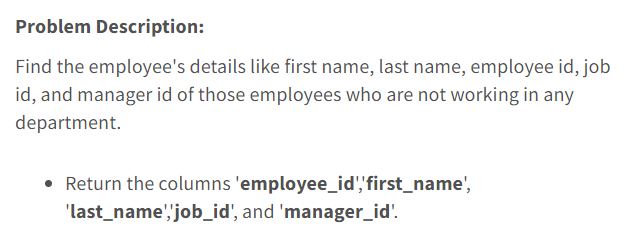

In [14]:
pd.read_sql_query('''



SELECT 
    employee_id,
    first_name,
    last_name,
    job_id,
    manager_id
    
FROM employees
WHERE department_id IS null  


''', conn).head(10)

,employee_id,first_name,last_name,job_id,manager_id
0,178,Kimberely,Grant,SA_REP,149


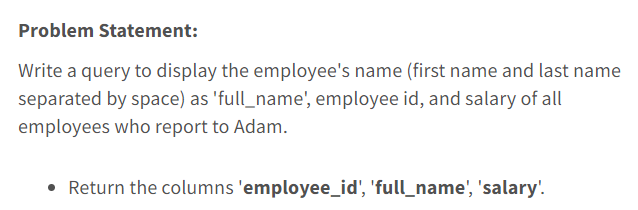

In [16]:
pd.read_sql_query('''


SELECT 
    employee_id,
    CONCAT(first_name," ",last_name) AS full_name,
    salary
FROM employees
WHERE manager_id IN 
    (
        SELECT 
            employee_id
        FROM employees
        WHERE first_name LIKE ('%Adam%')
    )


''', conn).head(10)

,employee_id,full_name,salary
0,129,Laura Bissot,3300
1,130,Mozhe Atkinson,2800
2,131,James Marlow,2500
3,132,TJ Olson,2100
4,184,Nandita Sarchand,4200
5,185,Alexis Bull,4100
6,186,Julia Dellinger,3400
7,187,Anthony Cabrio,3000


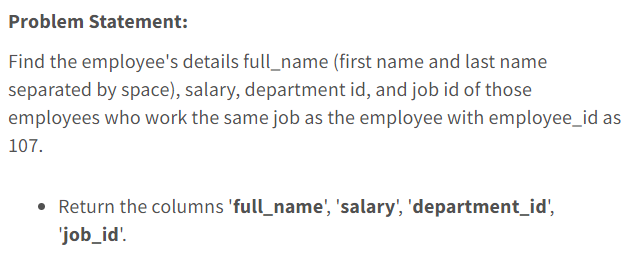

In [17]:
pd.read_sql_query('''


SELECT 
    CONCAT(first_name," ",last_name) AS full_name,
    salary,
    department_id,
    job_id
FROM employees
WHERE job_id = 'IT_PROG' 


''', conn).head(10)

,full_name,salary,department_id,job_id
0,Alexander Hunold,9000,60,IT_PROG
1,Bruce Ernst,6000,60,IT_PROG
2,David Austin,4800,60,IT_PROG
3,Valli Pataballa,4800,60,IT_PROG
4,Diana Lorentz,4200,60,IT_PROG


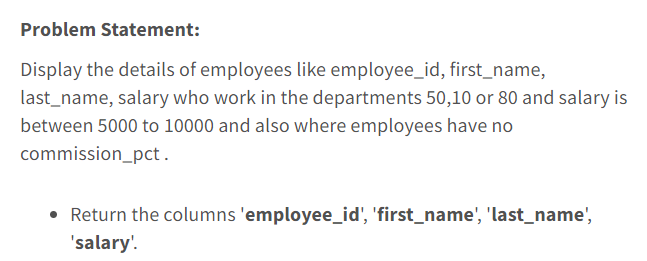

In [18]:
pd.read_sql_query('''


SELECT 
    employee_id,
    first_name,
    last_name,
    salary
FROM employees
WHERE (department_id IN (50,10,80)
        AND (salary >= 5000 AND salary <= 10000) 
        AND commission_pct IS NULL)
   

''', conn).head(10)

,employee_id,first_name,last_name,salary
0,120,Matthew,Weiss,8000
1,121,Adam,Fripp,8200
2,122,Payam,Kaufling,7900
3,123,Shanta,Vollman,6500
4,124,Kevin,Mourgos,5800


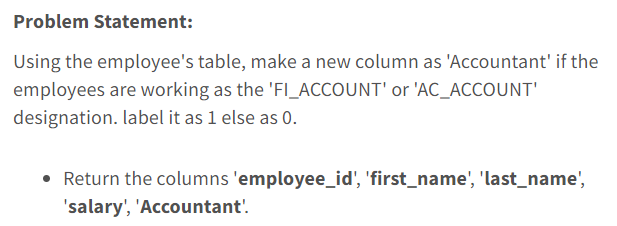

In [19]:
pd.read_sql_query('''


SELECT 
    employee_id,
    first_name,
    last_name,
    salary,
    CASE
        WHEN job_id IN ('FI_ACCOUNT' , 'AC_ACCOUNT')
        THEN 1
        ELSE 0
    END AS Accountant
FROM employees


''', conn).head(10)

,employee_id,first_name,last_name,salary,Accountant
0,100,Steven,King,25000,0
1,101,Neena,Kochhar,17000,0
2,102,Lex,De Haan,17000,0
3,103,Alexander,Hunold,9000,0
4,104,Bruce,Ernst,6000,0
5,105,David,Austin,4800,0
6,106,Valli,Pataballa,4800,0
7,107,Diana,Lorentz,4200,0
8,108,Nancy,Greenberg,12000,0
9,109,Daniel,Faviet,9000,1


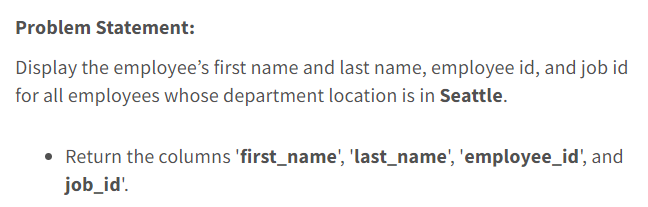

In [20]:
pd.read_sql_query('''



select 
    first_name,
    last_name,
    employee_id,
    job_id 
FROM employees 
WHERE department_id in 
    (
    SELECT department_id
        FROM departments
        WHERE location_id in 
            (
                SELECT location_id 
                FROM locations 
                WHERE city = 'Seattle'
            )
    )



''', conn).head(10)

,first_name,last_name,employee_id,job_id
0,Steven,King,100,AD_PRES
1,Neena,Kochhar,101,AD_VP
2,Lex,De Haan,102,AD_VP
3,Nancy,Greenberg,108,FI_MGR
4,Daniel,Faviet,109,FI_ACCOUNT
5,John,Chen,110,FI_ACCOUNT
6,Ismael,Sciarra,111,FI_ACCOUNT
7,Jose Manuel,Urman,112,FI_ACCOUNT
8,Luis,Popp,113,FI_ACCOUNT
9,Den,Raphaely,114,PU_MAN


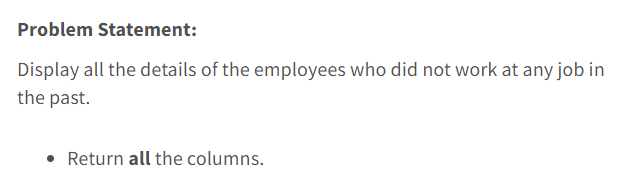

In [21]:
pd.read_sql_query('''


SELECT * 
FROM employees e
WHERE employee_id NOT IN 
    (
        SELECT 
            employee_id
        FROM job_history 
    )


''', conn).head(10)

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,25000,None,None,90.0
1,103,Alexander,Hunold,AHUNOLD,590.423.4567,1990-01-03,IT_PROG,9000,None,102,60.0
2,104,Bruce,Ernst,BERNST,590.423.4568,1991-05-21,IT_PROG,6000,None,103,60.0
3,105,David,Austin,DAUSTIN,590.423.4569,1997-06-25,IT_PROG,4800,None,103,60.0
4,106,Valli,Pataballa,VPATABAL,590.423.4560,1998-02-05,IT_PROG,4800,None,103,60.0
5,107,Diana,Lorentz,DLORENTZ,590.423.5567,1999-02-07,IT_PROG,4200,None,103,60.0
6,108,Nancy,Greenberg,NGREENBE,515.124.4569,1994-08-17,FI_MGR,12000,None,101,100.0
7,109,Daniel,Faviet,DFAVIET,515.124.4169,1994-08-16,FI_ACCOUNT,9000,None,108,100.0
8,110,John,Chen,JCHEN,515.124.4269,1997-09-28,FI_ACCOUNT,8200,None,108,100.0
9,111,Ismael,Sciarra,ISCIARRA,515.124.4369,1997-09-30,FI_ACCOUNT,7700,None,108,100.0


In [ ]:
pd.read_sql_query('''



SELECT 
    CONCAT(first_name, " ", last_name) AS full_name,
    salary
FROM employees
WHERE salary < 6000 OR salary > 18000
ORDER BY full_name 


''', conn).head(10)